# Sample Solution Worksheet for Lab 1 (Writing Python Code)


## 1. Running the Graphic Corporation Analysis

Complete the following based on the instructions in the course notes for this session.

### Running a complete script

After saving the `decisiontrees.py` and `graphic_corporation.py` files into the same folder as the current notebook. Type `run graphic_corporation.py` into the following cell and run the cell (following the instructions for the lab.) This will execute the `graphic_corporation.py` script and should display the decision tree for the graphic_corporation case.

In [34]:
run graphic_corporation.py

### Running chunks of code directly

Next, open graphic_corporation.py in Spyder (or any other editor) and copy and paste the code into the following code box. Alter the probability of okay to .85 instead of .92. Moreover, increase the failure cost to 200. Then execute the code.

**Answer:** This is simply changing the text `okay=.92` to `okay=.85`, and `failCost=100` to `failCost=200`.

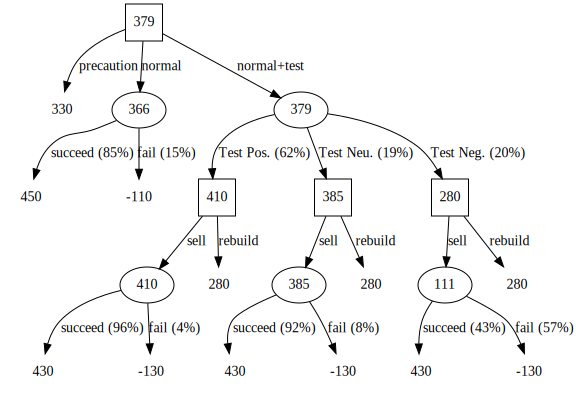

In [35]:
# -*- coding: utf-8 -*-
"""
Created on Mon Jan 22 13:09:39 2018

@author: pengshi
"""
from decisiontrees import Node
# Parameters for the decision tree
okay=.85

pos_when_okay=.7
neu_when_okay=.2
neg_when_okay=.1

pos_when_fail=.15
neu_when_fail=.1
neg_when_fail=.75

revenue=1050
baseCost=600
precautionCost=720
rebuildCost=150
reinstallCost=210
testCost=20
failCost=200

def buildTree():
    ''' The function builds the decision tree for the Graphic corporation case, given certain parameters '''
    
    # Calculate the relevant probabilities: pos_okay=P(pos and okay), okay_when_pos=P(okay|pos), posProb=P(pos)
    fail=1-okay
    pos_okay=okay*pos_when_okay
    pos_fail=fail*pos_when_fail
    neu_okay=okay*neu_when_okay
    neu_fail=fail*neu_when_fail
    neg_okay=okay*neg_when_okay
    neg_fail=fail*neg_when_fail

    okay_when_pos=pos_okay/(pos_okay+pos_fail)
    okay_when_neu=neu_okay/(neu_okay+neu_fail)
    okay_when_neg=neg_okay/(neg_okay+neg_fail)
    
    posProb=pos_okay+pos_fail
    neuProb=neu_okay+neu_fail
    negProb=neg_okay+neg_fail
    
    # Build the tree. For outcome nodes, we assign the value, which is the net profit from that outcome. 
    # For decision nodes, we give a list of children (branches from the node corresponding to possible decisions).
    # For event nodes, we give first a list of the children, then a list of the corresponding probabilities.
    pos_fail=Node('fail',value=revenue-baseCost-rebuildCost-reinstallCost-testCost-failCost)
    pos_succeed=Node('succeed',value=revenue-baseCost-testCost)
    pos_rebuild=Node('rebuild',value=revenue-baseCost-rebuildCost-testCost)
    pos_normal=Node('sell',[pos_succeed,pos_fail],[okay_when_pos, 1-okay_when_pos])
    pos_root=Node('Test Pos.',[pos_normal,pos_rebuild])

    neu_fail=Node('fail',value=revenue-baseCost-rebuildCost-reinstallCost-testCost-failCost)
    neu_succeed=Node('succeed',value=revenue-baseCost-testCost)
    neu_rebuild=Node('rebuild',value=revenue-baseCost-rebuildCost-testCost)
    neu_normal=Node('sell',[neu_succeed,neu_fail],[okay_when_neu,1-okay_when_neu])
    neu_root=Node('Test Neu.',[neu_normal,neu_rebuild])

    neg_fail=Node('fail',value=revenue-baseCost-rebuildCost-reinstallCost-testCost-failCost)
    neg_succeed=Node('succeed',value=revenue-baseCost-testCost)
    neg_rebuild=Node('rebuild',value=revenue-baseCost-rebuildCost-testCost)
    neg_normal=Node('sell',[neg_succeed,neg_fail],[okay_when_neg,1-okay_when_neg])
    neg_root=Node('Test Neg.',[neg_normal,neg_rebuild])

    precaution=Node('precaution',value=revenue-precautionCost)
    fail=Node('fail',value=revenue-baseCost-rebuildCost-reinstallCost-failCost)
    succeed=Node('succeed',value=revenue-baseCost)
    normal=Node('normal',[succeed,fail],[okay,1-okay])

    normal_test=Node('normal+test',[pos_root,neu_root,neg_root],[posProb,neuProb,negProb])
    tree=Node('Dana',[precaution,normal,normal_test])
    return tree

tree=buildTree()
graph=tree.graph()
graph


Type code in the following box to change the parameters you altered back to the original in the `graphic_corporation.py` below, then type `tree.graph(False)` below to display the shape of the tree without evaluting it.

**Note: you have to rebuild the tree by calling `tree=buildTree()` otherwise the probabilities will still be as above.**

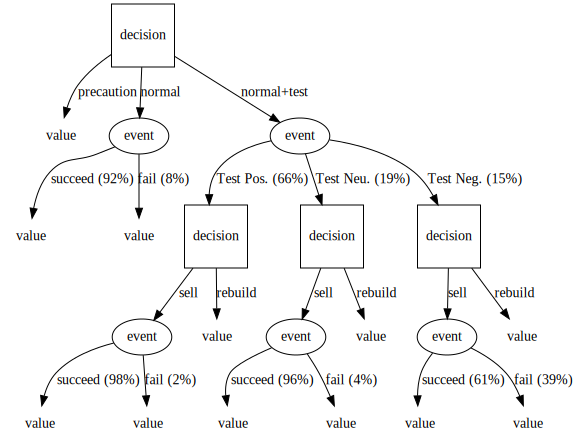

In [36]:
okay=.92
failCost=100
tree=buildTree()
tree.graph(False)

Copy and paste the set of all original parameters of the Graphic Corporation case into the following cell. Then copy and paste into the following cell the last chunk of code (Labelled In\[35\]) from the the [course notes for session 3](http://nbviewer.jupyter.org/github/pengshi-usc/usc-dso-570/blob/master/Course%20Notes/03-Decision%20trees.ipynb) (Decision trees). This plots the profit of each decision as the failure cost varies. Make sure the output is the same as the last graph of the above course notes. 

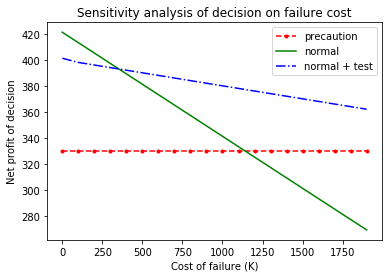

In [37]:
okay=.92

pos_when_okay=.7
neu_when_okay=.2
neg_when_okay=.1

pos_when_fail=.15
neu_when_fail=.1
neg_when_fail=.75

revenue=1050
baseCost=600
precautionCost=720
rebuildCost=150
reinstallCost=210
testCost=20
failCost=100

import matplotlib.pyplot as plt
failureCost=range(0,2000,100)
precaution=[]
normal=[]
normalTest=[]
for cost in failureCost:
    failCost=cost
    tree=buildTree()
    precautionNode,normalNode,normalTestNode=tree.children
    precaution.append(precautionNode.evaluate())
    normal.append(normalNode.evaluate())
    normalTest.append(normalTestNode.evaluate())
plt.plot(failureCost,precaution,'r--.',label='precaution')
plt.plot(failureCost,normal,'g',label='normal')
plt.plot(failureCost,normalTest,'b-.',label='normal + test')
plt.legend()
plt.title('Sensitivity analysis of decision on failure cost')
plt.ylabel('Net profit of decision')
plt.xlabel('Cost of failure (K)')
plt.show()


**Question:** *What is the optimal decision when the cost of failure is 750K?*

**Answer:** As can be seen in the plot, the blue line is the best when cost=750K. Therefore, the optimal decision is to build as normal and then test beforehand.

**Question:** *What does Shift-Enter in the Jupyter notebook do?* (See Jupyter help by typing ESC then h)

**Answer:** Shift-Enter executes the current cell and moves to the next cell. (Ctrl-Enter on the other hand executes the current cell and stay there. Alt-Enter executes the current cell and creates a new cell below.)


### Understanding the code

Use Spyder to open the two `.py` files you downloaded and identify the elements of Python from last session: objects, variables, functions, conditional statements, loops, import statements, etc. Use Python help (see course notes for instructions in Spyder and Jupyter notebooks) to help you understand unfamiliar commands. Do the same to the above code you copy pasted. The code may be complex for a beginner so it's okay if you don't get everything, but try your best.

After you are familiar with the code, answer the following questions.

**Question:** *What the line `from decisiontrees import Node` do?*

**Answer:** This line imports the Node object from the `decisiontrees.py` file in the current directory.

**Question:** *What does `precaution.append(precautionNode.evaluate())` above do?*

**Answer:** This evaluates the value of the node named `precautionNode`, and append this value to the end of the list named `precaution`.

**Question:** *What does `plt.plot(failureCost,precaution,'r--.',label='precaution')` do? Why is there a `'r--'` string as the third input?*

**Answer:** This plots the list `range(0,2000,100)` on the horizontal axis and the list named `precaution` on the vertical axis. `'r--'` corresponds to plotting it red with dashed lines. (See `plt.plot?` for explanation of all the color and style codes.)

# 2. Additional Sensitivity Analysis

Following the example above, make a plot of the value of the three decisions as a function of 

1. The rebuild cost, holding everything else at original values;
1. The precaution cost, holding everything else at original values;
2. The baseline probability of success, holding everything else at original values;

**Answer: this is similar to the above exept that instead of changing failCost inside the loop, we would change corresponding parameter being varied. Note that it is important to reset the parameters to the original value after each sensitivity analysis. To be safe we reset everything to the original value in the beginning (in case other code cells changed the parameters.) **

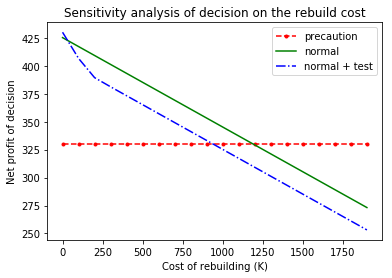

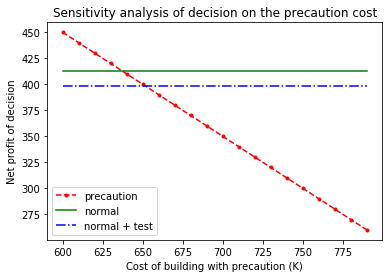

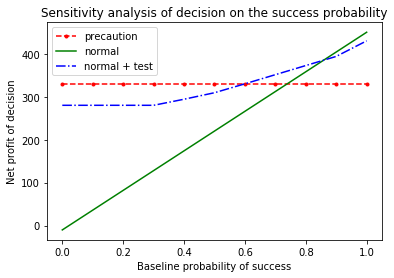

In [38]:
import matplotlib.pyplot as plt
import numpy as np
okay=.92

pos_when_okay=.7
neu_when_okay=.2
neg_when_okay=.1

pos_when_fail=.15
neu_when_fail=.1
neg_when_fail=.75

revenue=1050
baseCost=600
precautionCost=720
rebuildCost=150
reinstallCost=210
testCost=20
failCost=100

costList=range(0,2000,100)
precaution=[]
normal=[]
normalTest=[]
for cost in costList:
    rebuildCost=cost
    tree=buildTree()
    precautionNode,normalNode,normalTestNode=tree.children
    precaution.append(precautionNode.evaluate())
    normal.append(normalNode.evaluate())
    normalTest.append(normalTestNode.evaluate())
plt.plot(costList,precaution,'r--.',label='precaution')
plt.plot(costList,normal,'g',label='normal')
plt.plot(costList,normalTest,'b-.',label='normal + test')
plt.legend()
plt.title('Sensitivity analysis of decision on the rebuild cost')
plt.ylabel('Net profit of decision')
plt.xlabel('Cost of rebuilding (K)')
plt.show()

rebuildCost=150
precaution=[]
normal=[]
normalTest=[]
costList=range(600,800,10)

for cost in costList:
    precautionCost=cost
    tree=buildTree()
    precautionNode,normalNode,normalTestNode=tree.children
    precaution.append(precautionNode.evaluate())
    normal.append(normalNode.evaluate())
    normalTest.append(normalTestNode.evaluate())
plt.plot(costList,precaution,'r--.',label='precaution')
plt.plot(costList,normal,'g',label='normal')
plt.plot(costList,normalTest,'b-.',label='normal + test')
plt.legend()
plt.title('Sensitivity analysis of decision on the precaution cost')
plt.ylabel('Net profit of decision')
plt.xlabel('Cost of building with precaution (K)')
plt.show()
precautionCost=720

probList=np.linspace(0,1,11)
precaution=[]
normal=[]
normalTest=[]
for prob in probList:
    okay=prob
    tree=buildTree()
    precautionNode,normalNode,normalTestNode=tree.children
    precaution.append(precautionNode.evaluate())
    normal.append(normalNode.evaluate())
    normalTest.append(normalTestNode.evaluate())
plt.plot(probList,precaution,'r--.',label='precaution')
plt.plot(probList,normal,'g',label='normal')
plt.plot(probList,normalTest,'b-.',label='normal + test')
plt.legend()
plt.title('Sensitivity analysis of decision on the success probability')
plt.ylabel('Net profit of decision')
plt.xlabel('Baseline probability of success')
plt.show()
okay=.92


## Determine the Precise Threshold for a Decision

The failure cost graph at the end of section 1 shows roughly when it's optimal to do Normal+Test rather than Normal when the failure cost is about 300K, but it does not give the precise switch point. In this section, we find the precise answer. 

First, some new commands: the `scipy.optimize.bisect` function determines when is a function roughly zero, given a range to search within. The `str.format` function can be used to create formatted output. Below is an example. For additional details, use Python help or Google search. 

In [39]:
import scipy.optimize
def f(x):
    return x**2-4
print ('f(x)=0 at x={0:.2f}'.format(scipy.optimize.bisect(f,0,5)))
print ('f(x)=0 also at x={0:.2f}'.format(scipy.optimize.bisect(f,-5,0)))

f(x)=0 at x=2.00
f(x)=0 also at x=-2.00


Using the above as a guide, write a function that, given a failure cost, returns the difference between the value of the decision "Normal" and the decision "Normal+Test" under this failure cost. Then use the bisect function to figure out when this function is zero. This yields the exact failure cost above which it is better to perform the test. Similarly determine at what failure cost is it optimal to use "Precaution"

**Answer: in this question, we first adapt the code for `buildTree()` to take failure cost as an input. This turns out to be necessary for this case (you can test yourself what happens if you remove the input `failCost` in `buildTree()`. ) The reason is a concept called the "scope of a variable" which we will cover in later classes. (It is in general best practice to pass the parameters to a function as input, rather than rely on "global variables," which are the ones declared outside of the function, as in `okay=.92`, `pos_when_okay=.7`. We didn't use the best practice in this lab for simplicity. )** 

In [40]:
def buildTree(failCost):
    ''' The function builds the decision tree for the Graphic corporation case, given certain parameters '''
    
    # Calculate the relevant probabilities: pos_okay=P(pos and okay), okay_when_pos=P(okay|pos), posProb=P(pos)
    fail=1-okay
    pos_okay=okay*pos_when_okay
    pos_fail=fail*pos_when_fail
    neu_okay=okay*neu_when_okay
    neu_fail=fail*neu_when_fail
    neg_okay=okay*neg_when_okay
    neg_fail=fail*neg_when_fail

    okay_when_pos=pos_okay/(pos_okay+pos_fail)
    okay_when_neu=neu_okay/(neu_okay+neu_fail)
    okay_when_neg=neg_okay/(neg_okay+neg_fail)
    
    posProb=pos_okay+pos_fail
    neuProb=neu_okay+neu_fail
    negProb=neg_okay+neg_fail
    
    # Build the tree. For outcome nodes, we assign the value, which is the net profit from that outcome. 
    # For decision nodes, we give a list of children (branches from the node corresponding to possible decisions).
    # For event nodes, we give first a list of the children, then a list of the corresponding probabilities.
    pos_fail=Node('fail',value=revenue-baseCost-rebuildCost-reinstallCost-testCost-failCost)
    pos_succeed=Node('succeed',value=revenue-baseCost-testCost)
    pos_rebuild=Node('rebuild',value=revenue-baseCost-rebuildCost-testCost)
    pos_normal=Node('sell',[pos_succeed,pos_fail],[okay_when_pos, 1-okay_when_pos])
    pos_root=Node('Test Pos.',[pos_normal,pos_rebuild])

    neu_fail=Node('fail',value=revenue-baseCost-rebuildCost-reinstallCost-testCost-failCost)
    neu_succeed=Node('succeed',value=revenue-baseCost-testCost)
    neu_rebuild=Node('rebuild',value=revenue-baseCost-rebuildCost-testCost)
    neu_normal=Node('sell',[neu_succeed,neu_fail],[okay_when_neu,1-okay_when_neu])
    neu_root=Node('Test Neu.',[neu_normal,neu_rebuild])

    neg_fail=Node('fail',value=revenue-baseCost-rebuildCost-reinstallCost-testCost-failCost)
    neg_succeed=Node('succeed',value=revenue-baseCost-testCost)
    neg_rebuild=Node('rebuild',value=revenue-baseCost-rebuildCost-testCost)
    neg_normal=Node('sell',[neg_succeed,neg_fail],[okay_when_neg,1-okay_when_neg])
    neg_root=Node('Test Neg.',[neg_normal,neg_rebuild])

    precaution=Node('precaution',value=revenue-precautionCost)
    fail=Node('fail',value=revenue-baseCost-rebuildCost-reinstallCost-failCost)
    succeed=Node('succeed',value=revenue-baseCost)
    normal=Node('normal',[succeed,fail],[okay,1-okay])

    normal_test=Node('normal+test',[pos_root,neu_root,neg_root],[posProb,neuProb,negProb])
    tree=Node('Dana',[precaution,normal,normal_test])
    return tree    

def difference(failCost):
    tree=buildTree(failCost)
    precautionNode,normalNode,normalTestNode=tree.children
    return normalTestNode.evaluate()-normalNode.evaluate()

import scipy.optimize
print('Threshold cost of test (to two decimal places) is ${0:.2f}K.'.format(scipy.optimize.bisect(difference,0,500)))

Threshold cost of test (to two decimal places) is $353.33K.


# 3. Analyzing a Decision Tree from Scratch

Following the example provided in the code for the Graphic Coporation Case, create an analogous `buildTree()` function to construct the decision tree for the "Buying a House Case" in Homework 2. Afterward, graph the structure of the tree without solving, then graph it again with the evaluated values of each node. Finally, perform a sensitivity analysis by solving the tree with different probabilities of being the only bidder, as well as make a graph of the value of each decision as a function of the probability, as above. Find the precise points at which the optimal decision changes. Use markdown cells to explain each step of your analysis as if explaining to a supervisor, as in the course notes of session 3. 

If you have extra time, choose other parameters to perform sensitivity analysis, or choose another decision tree to analyze.

**Answer:** The decision tree for this case is as follows. As can be seen, the optimal solution is to bid low for now ($390K) and if asked to enter a second round, then add 5K. 

The intuition is that the house is not worth that much to Debbie and George compared to how much it costs, so it's best to take their chances with a low bid now, especially as there is a chance that they are the only bidders. However, suppose that they do have competition, then it's best for them to bid a little higher then and trade off a slightly worse price for a higher chance of winning.

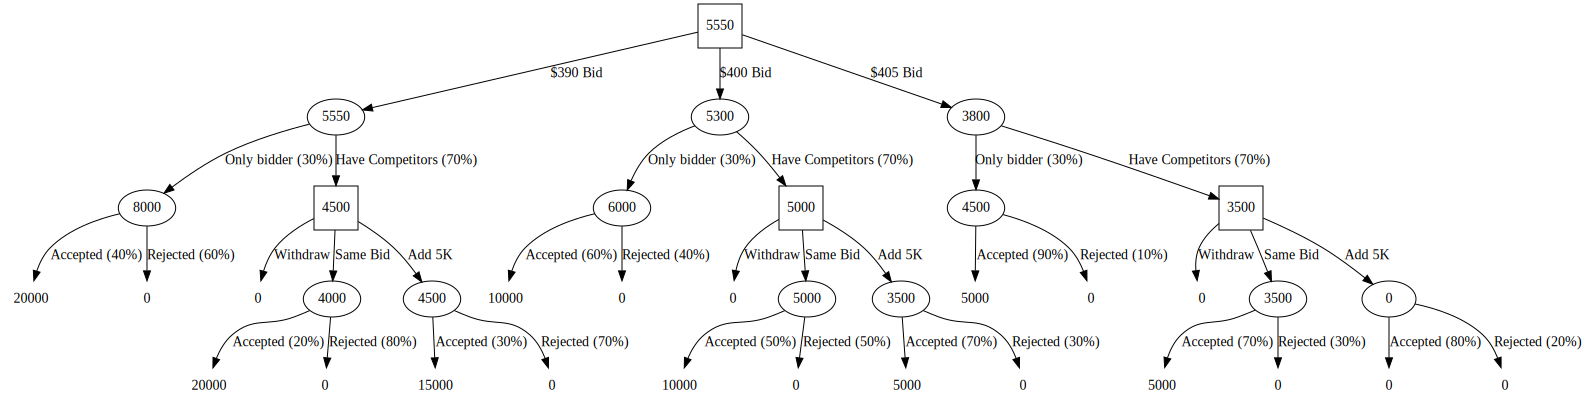

In [41]:
def buyingHouseTree(onlyProb=.3):
    # Naming convension for variables: L for low bid, M for medium bid, H for high bid, O for only bidder,
    # C for having competitors, A for accepted, R for rejected, W for withdraw, S for same, P for plus 5K.
    LOA=Node('Accepted',value=20000)
    LOR=Node('Rejected',value=0)
    LO=Node('Only bidder',[LOA,LOR],[.4,.6])
    
    LCW=Node('Withdraw',value=0)
    LCSA=Node('Accepted',value=20000)
    LCSR=Node('Rejected',value=0)
    LCS=Node('Same Bid', [LCSA,LCSR], [.2,.8])
    LCPA=Node('Accepted',value=15000)
    LCPR=Node('Rejected',value=0)
    LCP=Node('Add 5K', [LCPA,LCPR],[.3,.7])
    LC=Node('Have Competitors',[LCW,LCS,LCP])
    
    L=Node('$390 Bid',[LO,LC],[onlyProb,1-onlyProb])
    
    MOA=Node('Accepted',value=10000)
    MOR=Node('Rejected',value=0)
    MO=Node('Only bidder',[MOA,MOR],[.6,.4])
    
    MCW=Node('Withdraw',value=0)
    MCSA=Node('Accepted',value=10000)
    MCSR=Node('Rejected',value=0)
    MCS=Node('Same Bid', [MCSA,MCSR], [.5,.5])
    MCPA=Node('Accepted',value=5000)
    MCPR=Node('Rejected',value=0)
    MCP=Node('Add 5K', [MCPA,MCPR],[.7,.3])
    MC=Node('Have Competitors',[MCW,MCS,MCP])
    
    M=Node('$400 Bid',[MO,MC],[onlyProb,1-onlyProb])
    
    HOA=Node('Accepted',value=5000)
    HOR=Node('Rejected',value=0)
    HO=Node('Only bidder',[HOA,HOR],[.9,.1])
    
    HCW=Node('Withdraw',value=0)
    HCSA=Node('Accepted',value=5000)
    HCSR=Node('Rejected',value=0)
    HCS=Node('Same Bid', [HCSA,HCSR], [.7,.3])
    HCPA=Node('Accepted',value=0)
    HCPR=Node('Rejected',value=0)
    HCP=Node('Add 5K', [HCPA,HCPR],[.8,.2])
    HC=Node('Have Competitors',[HCW,HCS,HCP])
    
    H=Node('$405 Bid',[HO,HC],[onlyProb,1-onlyProb])
    
    root=Node('What to bid',[L,M,H])
    return root

tree=buyingHouseTree()
tree.graph()
              

**Note: If the tree is too big to see, you can type `tree.graph().view()` to view as PDF.**

For a sensitivity analysis, we plot the respectively expected values to Debbie and George of each initial bid, as a function of the probability of being the only bidder.

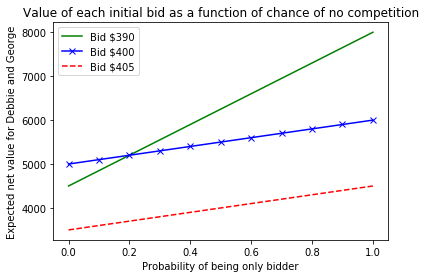

In [42]:
import matplotlib.pyplot as plt
import numpy as np
probList=np.linspace(0,1,11)
LValues=[]
MValues=[]
HValues=[]
for prob in probList:
    tree=buyingHouseTree(prob)
    L,M,H=tree.children
    LValues.append(L.evaluate())
    MValues.append(M.evaluate())
    HValues.append(H.evaluate())
plt.plot(probList,LValues,'g-',label='Bid $390')
plt.plot(probList,MValues,'bx-',label='Bid $400')
plt.plot(probList,HValues,'r--', label='Bid $405')
plt.legend()
plt.xlabel('Probability of being only bidder')
plt.ylabel('Expected net value for Debbie and George')
plt.title('Value of each initial bid as a function of chance of no competition')
plt.show()

As can be seen, the high bid of 405K is dominated in all scenarios. If the probability of being the only bidder is less than about 20%, then it is best to bid 400K to start off. However, if the probability of being the only bidder is more than about 20%, as in the current case, then it is best to bid low (390K) to begin with.